## Feature selection

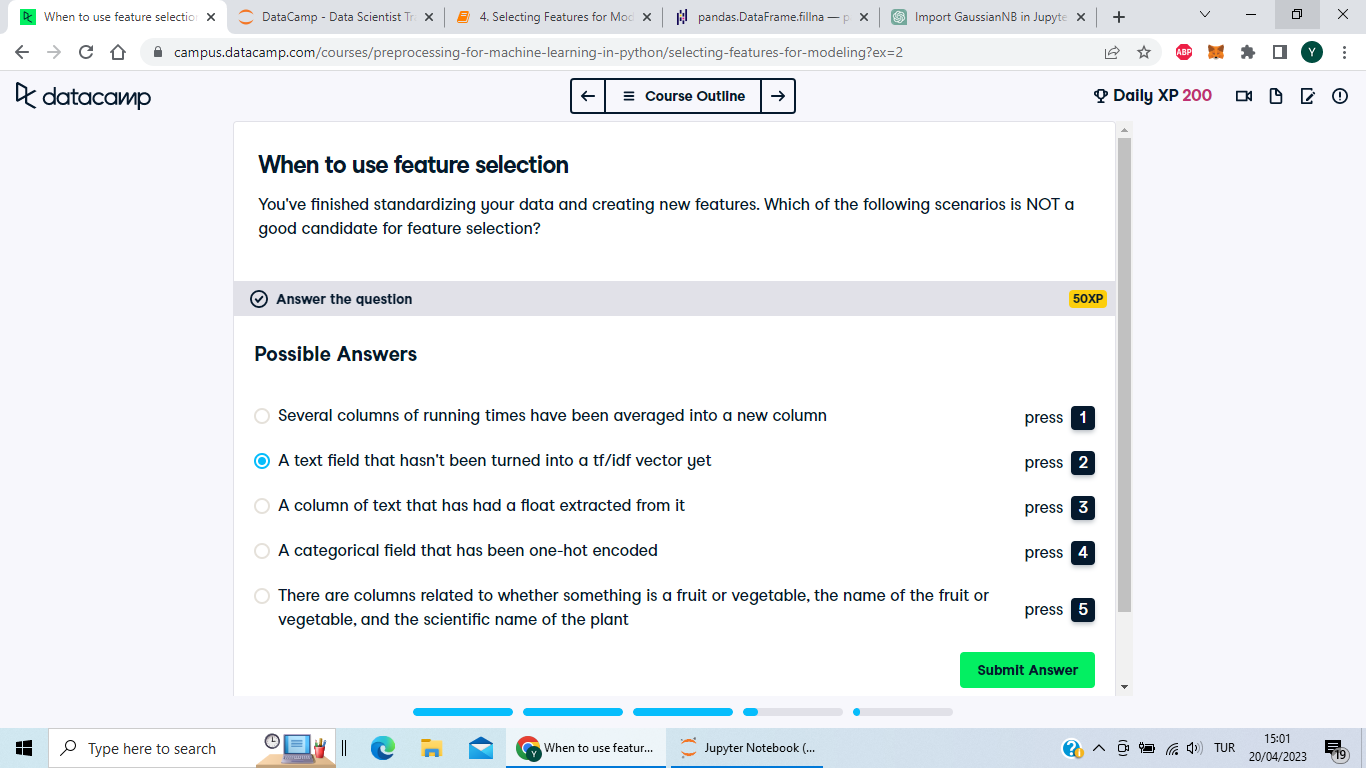

Correct! The text field needs to be vectorized before removing it, otherwise we might lose important data.

#### Identifying areas for feature selection
Take an exploratory look at the hiking dataset, which has already had a few different feature engineering techniques applied to it.

During the feature selection process, which of the following columns could be removed?

#### Possible Answers
<br>
a.Length<br>
b.Difficulty<br>
c.Accessible<br>
<strong>d.All of the above</strong><br>
e.None of the above

Correct! All three of these columns are good candidates for removal during feature selection. Because <strong>len_extracted</strong>, <strong>difficulty_encoded</strong> and <strong>accessible_encoded</strong> are new features created from existing ones 

In [2]:
import pandas as pd
hiking = pd.read_json('hiking.TXT')
hiking.head()

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


## Removing redundant features

#### Selecting relevant features
In this exercise, you'll identify the redundant columns in the volunteer dataset, and perform feature selection on the dataset to return a DataFrame of the relevant features.

For example, if you explore the volunteer dataset in the console, you'll see three features which are related to location: locality, region, and postalcode. They contain related information, so it would make sense to keep only one of the features.

Take some time to examine the features of volunteer in the console, and try to identify the redundant features.

In [11]:
volunteer = pd.read_csv('volunteer_opportunities.TXT')
volunteer.columns

Index(['opportunity_id', 'content_id', 'vol_requests', 'event_time', 'title',
       'hits', 'summary', 'is_priority', 'category_id', 'category_desc',
       'amsl', 'amsl_unit', 'org_title', 'org_content_id', 'addresses_count',
       'locality', 'region', 'postalcode', 'primary_loc', 'display_url',
       'recurrence_type', 'hours', 'created_date', 'last_modified_date',
       'start_date_date', 'end_date_date', 'status', 'Latitude', 'Longitude',
       'Community Board', 'Community Council ', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

In [21]:
# Create a list of redundant column names to drop
to_drop = ["locality", "region", "category_desc", "created_date", "vol_requests"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis = 1)

# Print out the head of volunteer_subset
volunteer_subset.head()

,opportunity_id,content_id,event_time,title,hits,summary,is_priority,category_id,amsl,amsl_unit,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,NaN,NaN,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,NaN,NaN,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5022,37237,0,Fight global hunger and support women farmers ...,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,NaN,NaN,...,March 31 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5055,37425,0,Stop 'N' Swap,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,NaN,NaN,...,February 05 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nice job! It's often easier to collect a list of columns to drop, rather than dropping them individually.

#### Checking for correlated features
You'll now return to the wine dataset, which consists of continuous, numerical features. Run Pearson's correlation coefficient on the dataset to determine which columns are good candidates for eliminating. Then, remove those columns from the DataFrame.

Drop any columns from wine that have a correlation coefficient above 0.75 with at least two other columns.

In [25]:
wine = pd.read_csv("wine_types.TXT")

# Print out the column correlations of the wine dataset
print(wine.corr())

# Drop that column from the DataFrame
wine = wine.drop(["Flavanoids"], axis = 1)

wine.head()

                                  Type   Alcohol  Malic acid       Ash  \
Type                          1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735


Good work! Dropping correlated features is often an iterative process, so you may need to try different combinations in your model.

## Selecting features using text vectors

#### Exploring text vectors, part 1
Let's expand on the text vector exploration method we just learned about, using the volunteer dataset's title tf/idf vectors. In this first part of text vector exploration, we're going to add to that function we learned about in the slides. We'll return a list of numbers with the function. In the next exercise, we'll write another function to collect the top words across all documents, extract them, and then use that list to filter down our text_tfidf vector.

In [26]:
vocab = {1048: 'web',
 278: 'designer',
 1017: 'urban',
 38: 'adventures',
 490: 'ice',
 890: 'skating',
 90: 'at',
 559: 'lasker',
 832: 'rink',
 368: 'fight',
 423: 'global',
 487: 'hunger',
 68: 'and',
 944: 'support',
 1061: 'women',
 356: 'farmers',
 535: 'join',
 969: 'the',
 708: 'oxfam',
 27: 'action',
 240: 'corps',
 498: 'in',
 680: 'nyc',
 922: 'stop',
 947: 'swap',
 790: 'queens',
 911: 'staff',
 281: 'development',
 992: 'trainer',
 200: 'claro',
 145: 'brooklyn',
 1037: 'volunteer',
 93: 'attorney',
 221: 'community',
 455: 'health',
 43: 'advocates',
 942: 'supervise',
 189: 'children',
 466: 'highland',
 717: 'park',
 409: 'garden',
 1071: 'worldofmoney',
 696: 'org',
 1085: 'youth',
 60: 'amazing',
 791: 'race',
 789: 'qualified',
 133: 'board',
 620: 'member',
 860: 'seats',
 98: 'available',
 1083: 'young',
 33: 'adult',
 1006: 'tutor',
 1016: 'updated',
 11: '30',
 0: '11',
 513: 'insurance',
 199: 'claims',
 600: 'manager',
 979: 'timebanksnyc',
 432: 'great',
 340: 'exchange',
 205: 'clean',
 1015: 'up',
 81: 'asbury',
 171: 'cementary',
 918: 'staten',
 524: 'island',
 869: 'senior',
 194: 'citizen',
 392: 'friendly',
 1033: 'visitor',
 881: 'shop',
 1000: 'tree',
 161: 'care',
 1068: 'workshop',
 4: '20',
 646: 'movie',
 856: 'screener',
 380: 'for',
 870: 'seniors',
 355: 'farm',
 430: 'graphic',
 691: 'open',
 480: 'house',
 416: 'get',
 984: 'tools',
 980: 'to',
 806: 'recycling',
 1039: 'volunteers',
 660: 'needed',
 353: 'family',
 336: 'event',
 207: 'clerical',
 158: 'cancer',
 1041: 'walk',
 120: 'befitnyc',
 739: 'physical',
 30: 'activity',
 700: 'organizers',
 269: 'decision',
 266: 'day',
 5: '2011',
 661: 'needs',
 1084: 'your',
 459: 'help',
 405: 'gain',
 1021: 'valuable',
 245: 'counseling',
 344: 'experience',
 687: 'on',
 845: 'samaritans',
 9: '24',
 479: 'hour',
 255: 'crisis',
 478: 'hotline',
 457: 'heart',
 407: 'gallery',
 703: 'our',
 503: 'info',
 949: 'table',
 373: 'finding',
 471: 'homes',
 542: 'kids',
 1077: 'yiddish',
 903: 'speaking',
 472: 'homework',
 460: 'helper',
 892: 'skilled',
 800: 'rebuilding',
 982: 'together',
 468: 'home',
 818: 'repairs',
 438: 'greenteam',
 40: 'advetures',
 940: 'summer',
 931: 'streets',
 1005: 'tuesday',
 335: 'evenings',
 1060: 'with',
 612: 'masa',
 594: 'lunch',
 770: 'program',
 1018: 'us',
 706: 'outreach',
 618: 'meals',
 760: 'preparedness',
 222: 'compost',
 773: 'project',
 613: 'master',
 223: 'composter',
 178: 'certificate',
 249: 'course',
 318: 'emblemhealth',
 144: 'bronx',
 683: 'of',
 873: 'service',
 531: 'jcc',
 601: 'manhattan',
 418: 'girl',
 855: 'scout',
 872: 'series',
 296: 'dorot',
 838: 'rosh',
 452: 'hashanah',
 709: 'package',
 274: 'delivery',
 713: 'painting',
 511: 'instructor',
 530: 'jasa',
 464: 'hes',
 172: 'center',
 12: '3rd',
 70: 'annual',
 377: 'flyny',
 548: 'kite',
 366: 'festival',
 983: 'tomorrow',
 151: 'business',
 566: 'leaders',
 955: 'teach',
 110: 'basics',
 465: 'high',
 852: 'schoolers',
 410: 'gardening',
 397: 'ft',
 1004: 'tryon',
 910: 'st',
 610: 'martin',
 748: 'poetry',
 668: 'new',
 1079: 'york',
 216: 'college',
 424: 'goal',
 941: 'sunday',
 361: 'february',
 6: '2012',
 262: 'dance',
 8: '22nd',
 560: 'latino',
 604: 'march',
 2: '17',
 1013: 'university',
 848: 'saturday',
 1008: 'tutors',
 744: 'planet',
 485: 'human',
 602: 'mapping',
 420: 'give',
 1050: 'week',
 186: 'child',
 569: 'learn',
 796: 'read',
 926: 'storytelling',
 243: 'costume',
 597: 'making',
 912: 'stage',
 277: 'design',
 319: 'emergency',
 351: 'fair',
 17: '9th',
 1053: 'west',
 887: 'side',
 248: 'county',
 676: 'nutrition',
 314: 'educator',
 879: 'shape',
 306: 'east',
 13: '54st',
 801: 'rec',
 1046: 'water',
 45: 'aerobics',
 83: 'asser',
 573: 'levy',
 712: 'paint',
 57: 'alongside',
 783: 'publicolor',
 936: 'students',
 536: 'jumpstart',
 797: 'readers',
 564: 'lead',
 252: 'crafts',
 408: 'games',
 348: 'face',
 751: 'popcorn',
 527: 'jackie',
 835: 'robinson',
 716: 'parent',
 375: 'fitness',
 916: 'starrett',
 197: 'city',
 585: 'line',
 263: 'dancer',
 615: 'math',
 587: 'literacy',
 114: 'be',
 209: 'climb',
 985: 'top',
 608: 'marketing',
 86: 'assistant',
 313: 'education',
 673: 'nonprofit',
 867: 'seeks',
 805: 'recruitment',
 626: 'mentors',
 810: 'register',
 92: 'attend',
 142: 'breakfast',
 701: 'orientation',
 529: 'january',
 272: 'deliver',
 1058: 'winter',
 1031: 'visit',
 65: 'an',
 525: 'isolated',
 342: 'exercise',
 213: 'coach',
 670: 'night',
 115: 'beach',
 180: 'change',
 77: 'art',
 772: 'programs',
 229: 'consumer',
 779: 'protection',
 562: 'law',
 589: 'liver',
 579: 'life',
 565: 'leader',
 901: 'soup',
 547: 'kitchen',
 307: 'eastern',
 534: 'john',
 650: 'muir',
 930: 'street',
 1024: 'vendor',
 641: 'monthly',
 959: 'team',
 367: 'fiesta',
 977: 'throgs',
 658: 'neck',
 224: 'computer',
 956: 'teacher',
 567: 'leadership',
 244: 'council',
 693: 'opportunity',
 231: 'conversation',
 461: 'helpers',
 427: 'grades',
 714: 'pantry',
 288: 'distribution',
 305: 'earth',
 960: 'tech',
 1049: 'website',
 692: 'opportunities',
 175: 'cents',
 19: 'ability',
 203: 'classroom',
 877: 'set',
 146: 'brush',
 545: 'kindness',
 999: 'transportation',
 58: 'alternatives',
 129: 'bike',
 1020: 'valet',
 1026: 'video',
 311: 'editing',
 767: 'professionals',
 921: 'stipend',
 49: 'after',
 851: 'school',
 624: 'mentor',
 666: 'networking',
 138: 'bowling',
 398: 'fun',
 449: 'harlem',
 555: 'lanes',
 866: 'seeking',
 1078: 'yoga',
 902: 'spanish',
 695: 'or',
 389: 'french',
 362: 'feed',
 488: 'hungry',
 1080: 'yorkers',
 14: '55',
 690: 'only',
 735: 'phone',
 106: 'bank',
 819: 'representative',
 795: 'reach',
 704: 'out',
 643: 'morris',
 458: 'heights',
 904: 'special',
 155: 'camp',
 946: 'susan',
 551: 'komen',
 259: 'cure',
 433: 'greater',
 47: 'affiliate',
 303: 'dumbo',
 79: 'arts',
 698: 'organizational',
 148: 'budget',
 639: 'money',
 596: 'makes',
 871: 'sense',
 994: 'training',
 889: 'site',
 1027: 'videographer',
 376: 'fly',
 152: 'by',
 970: 'theater',
 429: 'grant',
 1074: 'writer',
 745: 'planning',
 778: 'proposal',
 759: 'preparation',
 399: 'fund',
 793: 'raising',
 450: 'harm',
 808: 'reduction',
 35: 'adv',
 515: 'intern',
 875: 'serving',
 575: 'lgbt',
 34: 'adults',
 482: 'how',
 830: 'ride',
 130: 'bikes',
 821: 'research',
 401: 'fundraising',
 280: 'developement',
 233: 'cook',
 840: 'row',
 50: 'afterschool',
 630: 'middle',
 885: 'shower',
 400: 'fundraisers',
 526: 'it',
 519: 'interpreters',
 563: 'lawyers',
 446: 'haitian',
 18: 'abe',
 757: 'pre',
 412: 'ged',
 640: 'monitor',
 89: 'astoria',
 634: 'million',
 1001: 'trees',
 421: 'giveaway',
 290: 'do',
 1081: 'you',
 1044: 'want',
 595: 'make',
 283: 'difference',
 204: 'classwish',
 896: 'snow',
 883: 'shoveling',
 196: 'citizenship',
 761: 'press',
 586: 'list',
 781: 'public',
 813: 'relations',
 743: 'plan',
 829: 'review',
 394: 'friendship',
 753: 'positive',
 121: 'beginnings',
 546: 'kit',
 611: 'mary',
 803: 'recreation',
 291: 'does',
 697: 'organization',
 659: 'need',
 858: 'search',
 928: 'strategy',
 332: 'esl',
 46: 'affected',
 924: 'storm',
 995: 'transform',
 590: 'lives',
 933: 'strengthen',
 220: 'communities',
 119: 'become',
 302: 'driver',
 1025: 'veterans',
 191: 'chinese',
 997: 'translator',
 512: 'instructors',
 653: 'museum',
 621: 'membership',
 275: 'department',
 284: 'director',
 117: 'beautify',
 996: 'transitional',
 822: 'residence',
 470: 'homeless',
 623: 'men',
 953: 'tank',
 517: 'internship',
 774: 'projects',
 841: 'run',
 1056: 'wild',
 139: 'boys',
 475: 'hope',
 419: 'girls',
 219: 'communications',
 792: 'raise',
 100: 'awareness',
 31: 'administrative',
 56: 'alliance',
 811: 'registrar',
 647: 'ms',
 1062: 'word',
 162: 'career',
 246: 'counselor',
 722: 'passover',
 304: 'early',
 188: 'childhood',
 149: 'build',
 747: 'plastic',
 137: 'bottle',
 857: 'sculpture',
 763: 'pride',
 523: 'is',
 538: 'just',
 76: 'around',
 238: 'corner',
 520: 'involved',
 675: 'now',
 390: 'fresh',
 53: 'air',
 957: 'teachers',
 372: 'find',
 729: 'perfect',
 533: 'job',
 684: 'office',
 1075: 'writing',
 264: 'data',
 326: 'entry',
 29: 'activism',
 738: 'photography',
 843: 'salesforce',
 265: 'database',
 261: 'customization',
 736: 'photo',
 333: 'essay',
 572: 'legal',
 42: 'advisor',
 467: 'hike',
 974: 'thon',
 236: 'coordinator',
 558: 'laser',
 950: 'tag',
 298: 'dowling',
 3: '175th',
 505: 'information',
 962: 'technology',
 352: 'fall',
 382: 'forest',
 826: 'restoration',
 541: 'kickoff',
 1002: 'trevor',
 582: 'lifeline',
 247: 'counselors',
 973: 'thomas',
 532: 'jefferson',
 614: 'materials',
 1076: 'year',
 386: 'founder',
 341: 'executive',
 453: 'haunted',
 557: 'lantern',
 989: 'tours',
 383: 'fort',
 986: 'totten',
 657: 'national',
 878: 'sexual',
 82: 'assault',
 689: 'online',
 993: 'trainers',
 48: 'african',
 63: 'american',
 210: 'clothing',
 301: 'drive',
 828: 'returning',
 865: 'seeds',
 939: 'success',
 746: 'plant',
 981: 'today',
 443: 'growth',
 1009: 'udec',
 328: 'enviromedia',
 636: 'mobile',
 606: 'maritime',
 102: 'bacchanal',
 742: 'pirates',
 365: 'fest',
 492: 'ikea',
 329: 'erie',
 111: 'basin',
 282: 'diabetes',
 88: 'association',
 364: 'feria',
 267: 'de',
 844: 'salud',
 664: 'nepali',
 105: 'bangla',
 784: 'punjabi',
 998: 'translators',
 674: 'not',
 769: 'profit',
 741: 'pioneer',
 159: 'capoeira',
 1023: 'various',
 752: 'positions',
 287: 'dispatcher',
 991: 'trainee',
 506: 'ing',
 603: 'marathon',
 388: 'free',
 593: 'love',
 135: 'books',
 268: 'dear',
 96: 'authors',
 52: 'aide',
 850: 'scheuer',
 627: 'merchandise',
 293: 'donate',
 943: 'supplies',
 360: 'feast',
 406: 'gala',
 112: 'battery',
 833: 'rise',
 919: 'stay',
 787: 'put',
 820: 'rescue',
 897: 'soccer',
 402: 'futsal',
 730: 'performing',
 36: 'advanced',
 202: 'classes',
 1070: 'world',
 854: 'science',
 1054: 'western',
 64: 'americorps',
 25: 'aces',
 310: 'economic',
 864: 'security',
 507: 'initiative',
 331: 'esi',
 633: 'mill',
 173: 'centers',
 631: 'midtown',
 1088: 'zumba',
 1030: 'vision',
 635: 'mission',
 66: 'analysis',
 552: 'lab',
 958: 'teaching',
 84: 'assist',
 827: 'resume',
 150: 'building',
 899: 'society',
 214: 'coaches',
 1040: 'vs',
 218: 'committee',
 842: 'russian',
 385: 'foster',
 170: 'celebration',
 616: 'may',
 7: '21th',
 688: 'one',
 711: 'pager',
 294: 'donation',
 489: 'hurricane',
 521: 'irene',
 354: 'far',
 836: 'rockaway',
 325: 'enjoy',
 1066: 'working',
 686: 'olympics',
 988: 'tournament',
 798: 'reading',
 719: 'partners',
 234: 'cooper',
 909: 'square',
 975: 'thrift',
 908: 'spring',
 166: 'case',
 599: 'management',
 404: 'fvcp',
 990: 'trail',
 254: 'crew',
 447: 'halloween',
 165: 'carnival',
 1042: 'walkathon',
 359: 'feasibility',
 67: 'analyst',
 749: 'police',
 868: 'seminar',
 1064: 'work',
 1035: 'visually',
 496: 'impaired',
 964: 'teens',
 972: 'this',
 322: 'energy',
 315: 'efficiency',
 321: 'end',
 859: 'season',
 156: 'campaign',
 123: 'benefits',
 802: 'reception',
 300: 'drill',
 237: 'copywriting',
 235: 'coord',
 454: 'have',
 725: 'penchant',
 55: 'all',
 971: 'things',
 1028: 'vintage',
 976: 'thriftshop',
 718: 'partner',
 726: 'pencil',
 720: 'partnership',
 710: 'packing',
 16: '8th',
 907: 'sports',
 346: 'expo',
 164: 'cares',
 184: 'cheerleaders',
 1045: 'wanted',
 445: 'habitat',
 371: 'finance',
 215: 'coffee',
 324: 'english',
 755: 'practice',
 570: 'learners',
 456: 'healthy',
 28: 'active',
 978: 'time',
 122: 'benefit',
 73: 'april',
 357: 'fashion',
 929: 'strawberry',
 87: 'assistants',
 174: 'central',
 1087: 'zoo',
 1: '125th',
 127: 'bideawee',
 440: 'greeters',
 592: 'looking',
 799: 'real',
 495: 'impact',
 504: 'inform',
 728: 'people',
 756: 'practices',
 580: 'lifebeat',
 413: 'general',
 932: 'streetsquash',
 286: 'discovery',
 874: 'services',
 663: 'neighborhood',
 768: 'profiles',
 951: 'take',
 915: 'stand',
 51: 'against',
 1029: 'violence',
 345: 'expert',
 41: 'advice',
 537: 'june',
 849: 'schedule',
 258: 'crowdfunding',
 727: 'penny',
 451: 'harvest',
 434: 'green',
 185: 'chefs',
 677: 'nutritionists',
 379: 'foodies',
 625: 'mentoring',
 136: 'boom',
 669: 'newsletter',
 217: 'come',
 934: 'strides',
 1043: 'walks',
 187: 'childcare',
 898: 'social',
 619: 'media',
 422: 'giving',
 157: 'can',
 61: 'ambassador',
 10: '2nd',
 967: 'thanksgiving',
 363: 'feeding',
 662: 'needy',
 782: 'publicity',
 723: 'patient',
 163: 'caregiver',
 1032: 'visiting',
 469: 'homebound',
 358: 'fc',
 679: 'nyawc',
 384: 'forum',
 21: 'about',
 1038: 'volunteering',
 809: 'refreshments',
 847: 'sara',
 837: 'roosevelt',
 206: 'cleanup',
 116: 'beautification',
 337: 'events',
 69: 'animal',
 484: 'hudson',
 834: 'river',
 605: 'mariners',
 825: 'response',
 343: 'exhibit',
 20: 'aboard',
 584: 'lilac',
 208: 'client',
 1052: 'welcome',
 279: 'desk',
 685: 'older',
 574: 'lexington',
 251: 'craft',
 750: 'poll',
 1065: 'workers',
 518: 'interperters',
 24: 'accounting',
 85: 'assistance',
 477: 'hosting',
 776: 'promotion',
 1011: 'unicef',
 954: 'tap',
 814: 'release',
 270: 'dedication',
 771: 'programming',
 500: 'incarnation',
 295: 'donor',
 544: 'kieran',
 906: 'sponsorship',
 1069: 'workshops',
 118: 'because',
 338: 'every',
 276: 'deserves',
 179: 'chance',
 740: 'pin',
 273: 'delivered',
 886: 'shred',
 15: '5th',
 99: 'avenue',
 169: 'cdsc',
 917: 'starving',
 78: 'artist',
 884: 'show',
 948: 'system',
 396: 'front',
 880: 'share',
 553: 'lanch',
 935: 'student',
 463: 'hemophilia',
 577: 'liason',
 629: 'methodist',
 476: 'hospital',
 113: 'bay',
 831: 'ridge',
 124: 'benonhurst',
 75: 'area',
 900: 'sought',
 97: 'autistic',
 297: 'douglaston',
 788: 'qns',
 812: 'registration',
 32: 'administrator',
 153: 'call',
 426: 'governor',
 804: 'recruiter',
 786: 'purim',
 327: 'envelope',
 938: 'stuffing',
 528: 'jam',
 462: 'helpline',
 923: 'store',
 374: 'first',
 415: 'generation',
 1022: 'van',
 241: 'cortlandt',
 816: 'remembrance',
 945: 'survey',
 823: 'resonations',
 143: 'breast',
 323: 'engine',
 694: 'optimization',
 622: 'memorial',
 894: 'sloan',
 540: 'kettering',
 435: 'greenhouse',
 436: 'greening',
 227: 'concert',
 334: 'evacuation',
 824: 'resources',
 417: 'gift',
 126: 'bicycling',
 656: 'my',
 393: 'friends',
 473: 'honor',
 1051: 'weekend',
 731: 'person',
 651: 'mural',
 312: 'editor',
 732: 'personal',
 882: 'shopper',
 764: 'pro',
 134: 'bono',
 253: 'create',
 160: 'cards',
 920: 'step',
 672: 'non',
 780: 'provider',
 516: 'interns',
 645: 'motion',
 431: 'graphics',
 125: 'best',
 147: 'buddies',
 502: 'inern',
 103: 'back',
 588: 'little',
 242: 'cosmetologist',
 107: 'barber',
 1036: 'vocational',
 72: 'apartment',
 439: 'greeter',
 766: 'professional',
 1019: 'use',
 893: 'skills',
 702: 'others',
 369: 'figure',
 257: 'croton',
 190: 'chinatown',
 193: 'ci',
 758: 'prep',
 239: 'corporate',
 1063: 'wordpress',
 132: 'blog',
 510: 'instructer',
 807: 'red',
 474: 'hook',
 289: 'divert',
 966: 'textiles',
 395: 'from',
 554: 'landfill',
 437: 'greenmarket',
 965: 'textile',
 154: 'calling',
 195: 'citizens',
 497: 'improve',
 26: 'achievement',
 721: 'passion',
 481: 'housing',
 1067: 'works',
 499: 'inc',
 441: 'group',
 299: 'drama',
 561: 'laundromats',
 320: 'employment',
 927: 'strategic',
 667: 'never',
 104: 'bad',
 391: 'friend',
 403: 'future',
 201: 'class',
 1059: 'wish',
 387: 'fpcj',
 1072: 'worship',
 1010: 'undergraduate',
 428: 'graduate',
 228: 'conference',
 1047: 'we',
 775: 'promote',
 550: 'knowledge',
 715: 'parade',
 74: 'archivist',
 425: 'google',
 44: 'adwords',
 493: 'imentor',
 642: 'more',
 598: 'male',
 632: 'miles',
 637: 'moms',
 183: 'charity',
 176: 'century',
 987: 'tour',
 198: 'civil',
 724: 'patrol',
 62: 'america',
 539: 'kept',
 862: 'secret',
 648: 'ms131',
 549: 'knitter',
 256: 'crochet',
 131: 'blankets',
 177: 'ceo',
 591: 'logo',
 1012: 'unique',
 1057: 'will',
 128: 'big',
 37: 'adventure',
 23: 'accountant',
 876: 'session',
 888: 'single',
 644: 'mothers',
 192: 'choice',
 895: 'smc',
 1055: 'wii',
 705: 'outdoor',
 671: 'nights',
 607: 'market',
 514: 'intake',
 638: 'monday',
 141: 'branding',
 140: 'brand',
 491: 'identity',
 649: 'mt',
 1086: 'zion',
 543: 'kidz',
 817: 'reorganize',
 578: 'library',
 378: 'food',
 91: 'athletic',
 568: 'league',
 655: 'musician',
 59: 'alzheimer',
 654: 'music',
 109: 'bash',
 765: 'proctor',
 952: 'taking',
 339: 'exams',
 777: 'promotional',
 }

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(volunteer['title'])

# Add in the rest of the arguments
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
    # Transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # Sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]

# Print out the weighted words
print(return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, 8, 3))

[203, 27, 596]


Nice job! This is a little complicated, but you'll see how it comes together in the next exercise.

#### Exploring text vectors, part 2
Using the return_weights() function you wrote in the previous exercise, you're now going to extract the top words from each document in the text vector, return a list of the word indices, and use that list to filter the text vector down to those top words.

In [33]:
def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
    
        # Call the return_weights function and extend filter_list
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
        
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)

# Call the function to get the list of word indices
filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 3)

# Filter the columns in text_tfidf to only those in filtered_words
filtered_text = text_tfidf[:, list(filtered_words)]

KeyError: 963

Excellent! In the next exercise, you'll train a model using the filtered vector.

#### Training Naive Bayes with feature selection
You'll now re-run the Naive Bayes text classification model that you ran at the end of Chapter 3 with our selection choices from the previous exercise: the volunteer dataset's title and category_desc columns.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# Split the dataset according to the class distribution of category_desc
X_train, X_test, y_train, y_test = train_test_split(filtered_text.toarray(), y, stratify=y, random_state=42)

# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))

NameError: name 'filtered_text' is not defined

Awesome! You can see that our accuracy score wasn't that different from the score at the end of Chapter 3. But don't worry, this is mainly because of how small the title field is.

## Dimensionality reduction


#### Using PCA
In this exercise, you'll apply PCA to the wine dataset, to see if you can increase the model's accuracy.

In [50]:
from sklearn.decomposition import PCA
 
# Instantiate a PCA object
pca = PCA()

# Define the features and labels from the wine dataset
X = wine.drop('Type', axis = 1)
y = wine["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply PCA to the wine dataset X vector
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

[9.97802349e-01 2.02071713e-03 9.82348559e-05 5.53994004e-05
 1.10395648e-05 5.87233448e-06 3.13858204e-06 1.54420449e-06
 1.02927386e-06 3.90521513e-07 1.95535151e-07 8.99659634e-08]


Excellent! In the next exercise, you'll train a model using the PCA-transformed vector.

#### Training a model with PCA
Now that you have run PCA on the wine dataset, you'll finally train a KNN model using the transformed data.

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Fit knn to the training data
knn.fit(pca_X_train, y_train)

# Score knn on the test data and print it out
knn.score(pca_X_test, y_test)

0.7777777777777778

Good work! PCA turned out to be a good choice for the wine dataset.